Exponential smoothing is a time series forecasting method for univariate data that can be extended to support data with a systematic trend or seasonal component.

Time series methods like the Box-Jenkins ARIMA family of methods develop a model where the prediction is a weighted linear sum of recent past observations or lags.

Sources : https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/ \
https://analyticsindiamag.com/hands-on-guide-to-time-series-analysis-using-simple-exponential-smoothing-in-python/
#### Exponential smoothing forecasting methods 
are similar in that a prediction is a weighted sum of past observations, but the model explicitly uses an exponentially decreasing weight for past observations.

Specifically, past observations are weighted with a geometrically decreasing ratio.

```Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. In other words, the more recent the observation the higher the associated weight.```

#### Types of Exponential Smoothing

A simple method that assumes no systematic structure, an extension that explicitly handles trends, and the most advanced approach that add support for seasonality.

1. **Single Exponential Smoothing (SES)**

    is a time series forecasting method for univariate data without a trend or seasonality.
    It requires a single parameter,
    * **alpha (a)**, also called the smoothing factor or smoothing coefficient.
    
    This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. Alpha is often set to a value between 0 and 1. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.
    
   Hyperparameters:
   * Alpha: Smoothing factor for the level.
   

2. **Double Exponential Smoothing (Holt’s Method)**

    is an extension to Exponential Smoothing that explicitly adds support for trends in the univariate time series.In     addition to the alpha parameter for controlling smoothing factor for the level,
    
    an additional **smoothing factor**     is added to control the decay of the influence of the change in trend called **beta (b).**\
    The method supports trends that change in different ways: an additive and a multiplicative, depending on whether the trend is linear or exponential respectively. Double Exponential Smoothing with an additive trend is classically referred to as Holt’s linear trend model, named for the developer of the method Charles Holt.
    * Additive Trend: Double Exponential Smoothing with a linear trend.
    * Multiplicative Trend: Double Exponential Smoothing with an exponential trend.
        
   For longer range (multi-step) forecasts, the trend may continue on unrealistically. As such, it can be useful to dampen the trend over time.\
   **Dampening** means reducing the size of the trend over future time steps down to a straight line (no trend).
   A damping coefficient **Phi (p)** is used to control the rate of dampening.
   * Additive Dampening: Dampen a trend linearly.
   * Multiplicative Dampening: Dampen the trend exponentially.
   
   Hyperparameters:
   * Alpha: Smoothing factor for the level.
   * Beta: Smoothing factor for the trend.
   * Trend Type: Additive or multiplicative.
   * Dampen Type: Additive or multiplicative.
   * Phi: Damping coefficient.
   
   
3. **Triple Exponential Smoothing (Holt-Winters Exponential Smoothing)**
    
    Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series. It can also develop double and single exponential smoothing models. 
    
    In addition to the alpha and beta smoothing factors, a new parameter is added called 
    **gamma (g)** that controls the influence on the seasonal component.
    * Additive Seasonality: Triple Exponential Smoothing with a linear seasonality.
    * Multiplicative Seasonality: Triple Exponential Smoothing with an exponential seasonality.
    
   Additionally, to ensure that the seasonality is modeled correctly, the number of time steps in a **seasonal period (Period)** must be specified. For example, if the series was monthly data and the seasonal period repeated each year, then the Period=12.
   
   Hyperparameters:

    * Alpha: Smoothing factor for the level.
    * Beta: Smoothing factor for the trend.
    * Gamma: Smoothing factor for the seasonality.
    * Trend Type: Additive or multiplicative.
    * Dampen Type: Additive or multiplicative.
    * Phi: Damping coefficient.
    * Seasonality Type: Additive or multiplicative.
    * Period: Time steps in seasonal period.

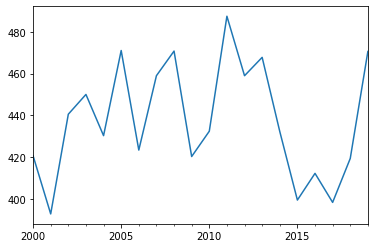

In [67]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Synthetic dataset without trend or seasonality, yearly 20 years. 

index= pd.date_range(start='2000', end='2020', freq='A')
data = pd.Series([ 420.735,392.943, 440.593, 450.037, 430.345, 471.033, 423.456, 458.989, 470.767, 420.368,
                  432.456, 487.409, 458.989, 467.765, 432.341, 399.563, 412.324, 398.452, 419.452, 470.567], index)

data.plot()

In [76]:
# Single Exponential Smoothing via the SimpleExpSmoothing Statsmodels class.

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(data)

# manually selected alpha/smoothing factor
model_fit = model.fit(smoothing_level=0.8, optimized=False, start_params=None, initial_level=None, use_brute=True)

#predictions
yhat = model_fit.predict(data.index.min(), data.index.max())

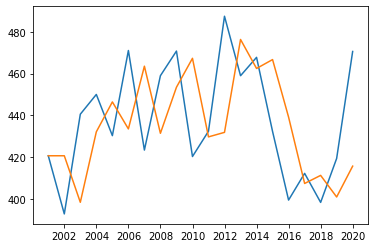

In [77]:
plt.plot(data)
plt.plot(yhat)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [78]:
mean_absolute_error(data, yhat), mean_squared_error(data, yhat)

(25.947284849778168, 954.6312346788069)

In [79]:
model_fit.summary()

Dep. Variable:,endog,No. Observations:,20
Model:,SimpleExpSmoothing,SSE,19092.625
Optimized:,False,AIC,141.227
Trend:,None,BIC,143.218
Seasonal:,None,AICC,143.893
Seasonal Periods:,None,Date:,"Mon, 22 Feb 2021"
Box-Cox:,False,Time:,10:42:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8000000,alpha,False
initial_level,420.73500,l.0,False


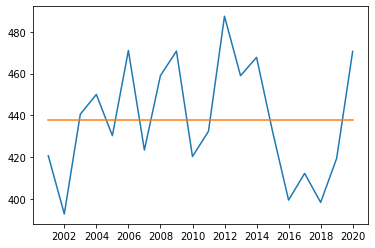

In [80]:
# let statsmodels optimize the parameters
model = SimpleExpSmoothing(data)
model_fit = model.fit()

#predictions
yhat = model_fit.predict(data.index.min(), data.index.max())

plt.plot(data)
plt.plot(yhat)

In [81]:
mean_absolute_error(data, yhat), mean_squared_error(data, yhat)

(23.478620459340508, 730.0989504600209)

In [82]:
model_fit.summary()

Dep. Variable:,endog,No. Observations:,20
Model:,SimpleExpSmoothing,SSE,14601.979
Optimized:,True,AIC,135.864
Trend:,None,BIC,137.855
Seasonal:,None,AICC,138.530
Seasonal Periods:,None,Date:,"Mon, 22 Feb 2021"
Box-Cox:,False,Time:,10:42:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.000000,alpha,True
initial_level,437.92920,l.0,True


In [65]:
# double or triple exponential smoothing

"""
Configuration parameters:

trend: The type of trend component, as either “add” for additive or “mul” for multiplicative. 
Modeling the trend can be disabled by setting it to None.

damped: Whether or not the trend component should be damped, either True or False.

seasonal: The type of seasonal component, as either “add” for additive or “mul” for multiplicative.
Modeling the seasonal component can be disabled by setting it to None.

seasonal_periods: The number of time steps in a seasonal period, e.g. 12 for 12 months in a yearly seasonal structure.

fit() allows you to either specify the smoothing coefficients of the exponential smoothing model or have them optimized.
By default, they are optimized (e.g. optimized=True). These coefficients include:

smoothing_level (alpha): the smoothing coefficient for the level.
smoothing_slope (beta): the smoothing coefficient for the trend.
smoothing_seasonal (gamma): the smoothing coefficient for the seasonal component.
damping_slope (phi): the coefficient for the damped trend.
Additionally, the fit function can perform basic data preparation prior to modeling; specifically:

use_boxcox: Whether or not to perform a power transform of the series (True/False)
or specify the lambda for the transform.
"""

sales = pd.read_csv('Datasets/competitive-competitive-data-science-predict-future-sales/sales_train.csv')
sales.date = sales.date.apply(lambda x: datetime.strptime(x , '%d.%m.%Y'))
sales.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0


In [85]:
# trend and seasonality 

sales_mean = sales.groupby(['date_block_num'])['item_price'].mean()

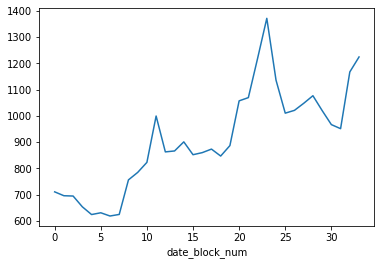

In [87]:
sales_mean.plot()

In [103]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Double Exponential Smoothing (Holt’s Method), only modelling a linear trend with no damping and optimized alpha and
# beta

model = ExponentialSmoothing(sales_mean, trend='add', damped=False, seasonal=None,
                             seasonal_periods=None, dates=None, freq=None, missing='none')

model_fit = model.fit(smoothing_level=None, smoothing_slope = None, optimized=True, start_params=None,
                      initial_level=None, use_brute=True)

In [104]:
#predictions, additional 30 days 
yhat = model_fit.predict(sales_mean.index.min(), sales_mean.index.max() + 30)

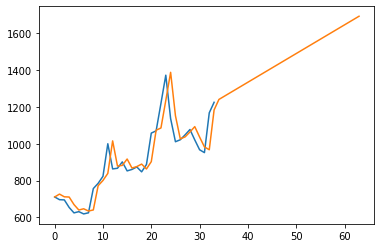

In [105]:
plt.plot(sales_mean)
plt.plot(yhat)

In [106]:
## Holts winter, modelling the seasonality and optimised smoothing_seasonal gamma coefficient

model = ExponentialSmoothing(sales_mean, trend='add', damped=False, seasonal='add',
                             seasonal_periods=12, dates=None, freq=None, missing='none')

model_fit = model.fit(smoothing_level=None, smoothing_slope = None, optimized=True, start_params=None,
                      initial_level=None, use_brute=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


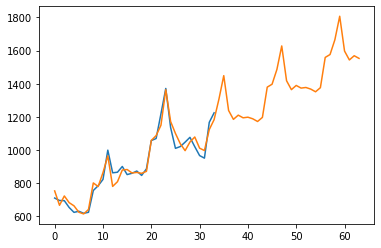

In [107]:
#predictions, additional 30 days 
yhat = model_fit.predict(sales_mean.index.min(), sales_mean.index.max() + 30)

plt.plot(sales_mean)
plt.plot(yhat)